# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf
from statsmodels.iolib.summary import summary

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [5]:
# Converter 'num' em variável binária (0 = saudável, 1 = doente)
df['num'] = (df['num'] > 0).astype(int)

# Criar tabela bivariada
tabela_bivariada = df.groupby('sex')['num'].agg(['sum', 'count'])
tabela_bivariada.columns = ['Número de Doentes', 'Total']
tabela_bivariada['Número de Saudáveis'] = tabela_bivariada['Total'] - tabela_bivariada['Número de Doentes']

# Calcular estatísticas adicionais
tabela_bivariada['Quantidade Média de Doentes'] = tabela_bivariada['Número de Doentes'] / tabela_bivariada['Total']
tabela_bivariada['Odds'] = tabela_bivariada['Número de Doentes'] / tabela_bivariada['Número de Saudáveis']
tabela_bivariada['Logito (Log(Odds))'] = np.log(tabela_bivariada['Odds'])

# Calcular Odds Ratio em relação ao total da base
total_odds = tabela_bivariada['Número de Doentes'].sum() / tabela_bivariada['Número de Saudáveis'].sum()
tabela_bivariada['Odds Ratio'] = tabela_bivariada['Odds'] / total_odds

# Calcular Weight of Evidence (WOE)
tabela_bivariada['WOE (Log do Odds Ratio)'] = np.log(tabela_bivariada['Odds Ratio'])

# Exibir a tabela formatada
print(tabela_bivariada[['Número de Saudáveis', 'Número de Doentes', 'Total',
                        'Quantidade Média de Doentes', 'Odds', 'Odds Ratio',
                        'Logito (Log(Odds))', 'WOE (Log do Odds Ratio)']])

     Número de Saudáveis  Número de Doentes  Total  \
sex                                                  
0.0                   72                 25     97   
1.0                   92                114    206   

     Quantidade Média de Doentes      Odds  Odds Ratio  Logito (Log(Odds))  \
sex                                                                          
0.0                     0.257732  0.347222    0.409672            -1.05779   
1.0                     0.553398  1.239130    1.461996             0.21441   

     WOE (Log do Odds Ratio)  
sex                           
0.0                -0.892398  
1.0                 0.379802  


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [6]:
# Criar 5 categorias de idade usando `pd.cut`
df['age_group'] = pd.cut(df['age'], bins=5)


# Criar tabela bivariada por grupo de idade
tabela_bivariada = df.groupby('age_group')['num'].agg(['sum', 'count'])
tabela_bivariada.columns = ['Número de Doentes', 'Total']
tabela_bivariada['Número de Saudáveis'] = tabela_bivariada['Total'] - tabela_bivariada['Número de Doentes']


# Calcular estatísticas adicionais
tabela_bivariada['Quantidade Média de Doentes'] = tabela_bivariada['Número de Doentes'] / tabela_bivariada['Total']
tabela_bivariada['Odds'] = tabela_bivariada['Número de Doentes'] / tabela_bivariada['Número de Saudáveis']
tabela_bivariada['Logito (Log(Odds))'] = np.log(tabela_bivariada['Odds'])


# Calcular Odds Ratio em relação ao total da base
total_odds = tabela_bivariada['Número de Doentes'].sum() / tabela_bivariada['Número de Saudáveis'].sum()
tabela_bivariada['Odds Ratio'] = tabela_bivariada['Odds'] / total_odds


# Calcular Weight of Evidence (WOE)
tabela_bivariada['WOE (Log do Odds Ratio)'] = np.log(tabela_bivariada['Odds Ratio'])

# Calcular a idade média por grupo
tabela_bivariada['Idade Média'] = df.groupby('age_group')['age'].mean()


# Exibir a tabela formatada
print(tabela_bivariada[['Número de Saudáveis', 'Número de Doentes', 'Total',
                        'Quantidade Média de Doentes', 'Odds', 'Odds Ratio',
                        'Logito (Log(Odds))', 'WOE (Log do Odds Ratio)', 'Idade Média']])

                Número de Saudáveis  Número de Doentes  Total  \
age_group                                                       
(28.952, 38.6]                    8                  3     11   
(38.6, 48.2]                     50                 21     71   
(48.2, 57.8]                     56                 41     97   
(57.8, 67.4]                     40                 67    107   
(67.4, 77.0]                     10                  7     17   

                Quantidade Média de Doentes      Odds  Odds Ratio  \
age_group                                                           
(28.952, 38.6]                     0.272727  0.375000    0.442446   
(38.6, 48.2]                       0.295775  0.420000    0.495540   
(48.2, 57.8]                       0.422680  0.732143    0.863823   
(57.8, 67.4]                       0.626168  1.675000    1.976259   
(67.4, 77.0]                       0.411765  0.700000    0.825899   

                Logito (Log(Odds))  WOE (Log do Odds Ratio) 

/tmp/ipykernel_8448/2257280341.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabela_bivariada = df.groupby('age_group')['num'].agg(['sum', 'count'])
/tmp/ipykernel_8448/2257280341.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabela_bivariada['Idade Média'] = df.groupby('age_group')['age'].mean()


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

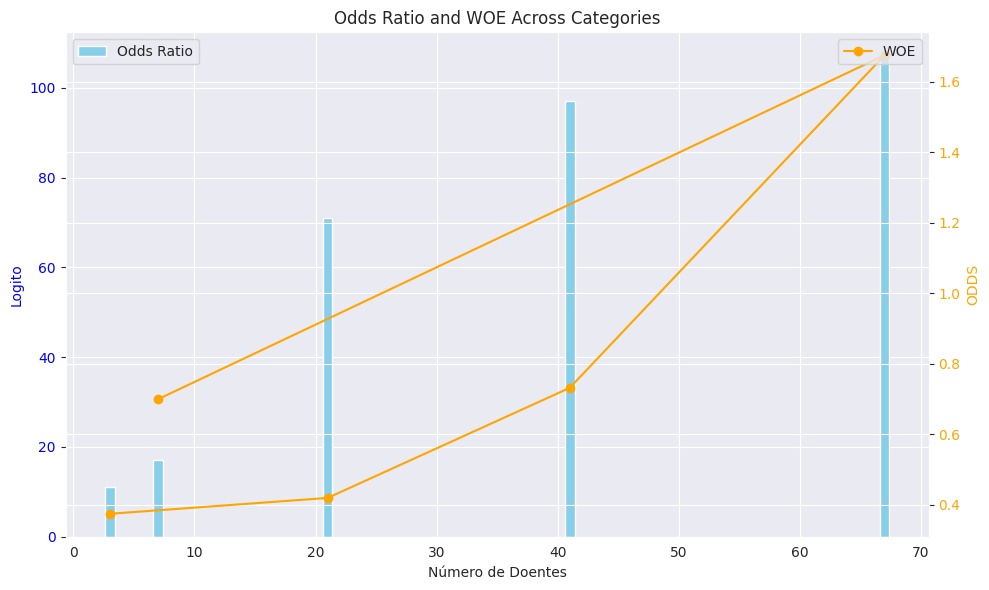

In [20]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for odds_ratio
ax1.bar(tabela_bivariada['Número de Doentes'], tabela_bivariada['Total'], color='skyblue', label='Odds Ratio')
ax1.set_xlabel('Número de Doentes')
ax1.set_ylabel('Logito', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Odds Ratio and WOE Across Categories')
ax1.legend(loc='upper left')

# Line plot for WOE
ax2 = ax1.twinx()
ax2.plot(tabela_bivariada['Número de Doentes'], tabela_bivariada['Odds'], color='orange', label='WOE', marker='o')
ax2.set_ylabel('ODDS', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()